# Distribution shifts in MS MARCO

This notebook aims at giving a better understanding of the distribution shifts we created, through data visualization.

In [1]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import seaborn as sns
import pickle
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams["figure.dpi"] = 150

In [3]:
# Load the queries
queries = pd.read_csv('../TRAIN/queries_clustering.tsv', sep='\t')

In [4]:
queries

,query,topic_cluster,topic_train,whword_cluster,whword_train,length_cluster,length_train
0,Another name for the primary visual cortex is,5,0,3,0,1,1
1,Defining alcoholism as a disease is associate...,3,1,3,0,1,1
2,ECT is a treatment that is used for,3,1,3,0,1,1
3,"Ebolavirus is an enveloped virus, which means",4,1,2,1,1,1
4,"In humans, the normal set point for body temp...",2,1,3,0,1,1
...,...,...,...,...,...,...,...
398787,ÅchÅ means what in japanese,5,0,0,1,0,1
398788,â¢ what is peristaltic movement and how does ...,2,1,1,1,1,1
398789,â¢#TAB#Can an employer deduct the cost of a c...,4,1,3,0,1,1
398790,â¢What types of movement in Earthâs crust c...,4,1,3,0,1,1


## PCA/TSNE

In [4]:
def pca_tsne(data, path, to_rm, color):
    # PCA
    print("Computing PCA...")
    pca = PCA(n_components=3)
    pca_result = pca.fit_transform(data.iloc[:,0:768].values)
    print("Explained variation per component:", pca.explained_variance_ratio_)
    data['pca-one'] = pca_result[:,0]
    data['pca-two'] = pca_result[:,1]
    data['pca-three'] = pca_result[:,2]
    
    # TSNE
    print("Computing tsne...")
    np.random.seed(1234)
    rndperm = np.random.permutation(data.shape[0])
    # For the tsne we use a subset of the entire dataset
    N = 10000
    df_subset = data.loc[rndperm[:N],:].copy()
    data_subset = df_subset.iloc[:,0:768].values
    # tsne on the 50th first principal components
    pca_50 = PCA(n_components=50)
    pca_result_50 = pca_50.fit_transform(data_subset)
    tsne = TSNE(n_components=2, verbose=0, perplexity=40, n_iter=300)
    tsne_pca_results = tsne.fit_transform(pca_result_50)
    df_subset['tsne-pca50-one'] = tsne_pca_results[:,0]
    df_subset['tsne-pca50-two'] = tsne_pca_results[:,1]

    plt.figure(figsize=(16/3*2,4))
    ax1 = plt.subplot(1, 2, 1)
    sns.scatterplot(
        x="pca-one", y="pca-two",
        hue="cluster",
        palette=color,
        data=df_subset[df_subset['cluster']!=to_rm],
        legend="full",
        alpha=0.3,
        ax=ax1
    )
    ax2 = plt.subplot(1, 2, 2)
    sns.scatterplot(
        x="tsne-pca50-one", y="tsne-pca50-two",
        hue="cluster",
        palette=color,
        data=df_subset[df_subset['cluster']!=to_rm],
        legend="full",
        alpha=0.3,
        ax=ax2
    )
    
    plt.savefig(path, bbox_inches='tight')#, pad_inches=0)
    plt.show()

### Topics

In [5]:
# add CLS token representations of a vanilla distilbert
h_CLS = pickle.load(open("h_CLS.p", "rb"))

In [6]:
data = pd.DataFrame(h_CLS)
data['cluster'] = queries['topic_cluster']

Computing PCA...
Explained variation per component: [0.11793535 0.07369799 0.06431415]
Computing tsne...


/home/slupart/miniconda3/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/slupart/miniconda3/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


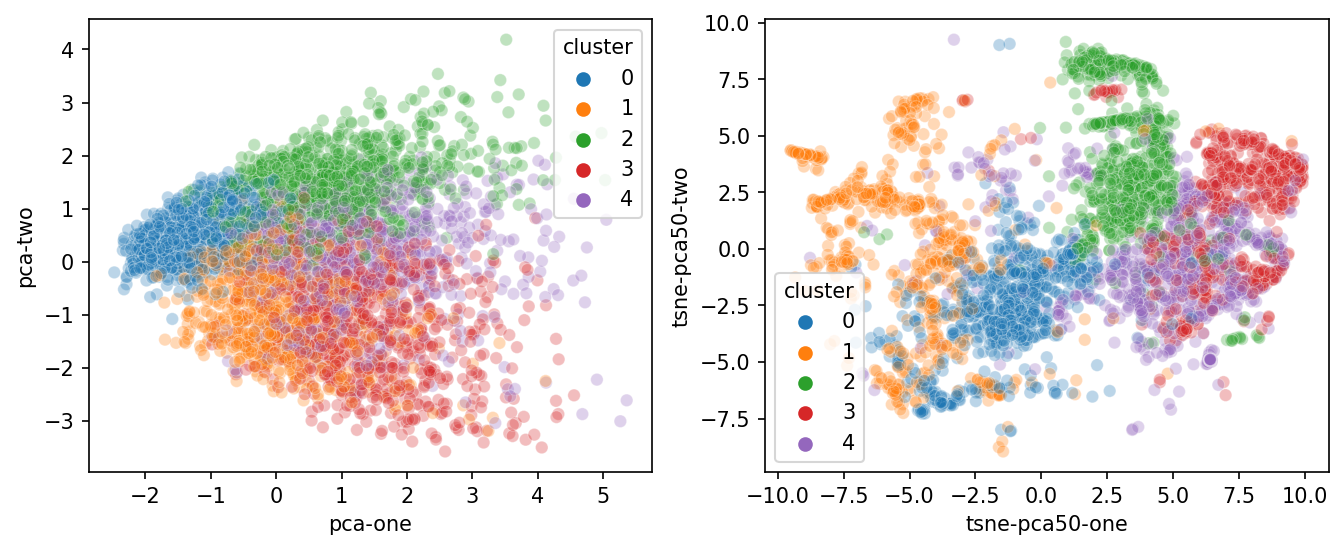

In [7]:
color = sns.color_palette("tab10", 5)
pca_tsne(data, '../fig/topic.png', 5, color)

Both pca and tsne on query-topics enable us to better understand how the clusters are created. From the plots, we see that clusters 3 and 5 are close to each other, which is natural as they are resp. about medicine and biology. Tsne on query-topic (right) is also interesting, as we can clearly see that there are gaps between the clusters (thanks to the "others" category).

### WH-Words

Even if both wh-word and length based clusters are not designed from the CLS representations, we still wanted to display the PCA/tsne with respect to those clusters.

In [8]:
data['cluster'] = queries['whword_cluster']

Computing PCA...
Explained variation per component: [0.11791814 0.07368709 0.06430478]
Computing tsne...


/home/slupart/miniconda3/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/slupart/miniconda3/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


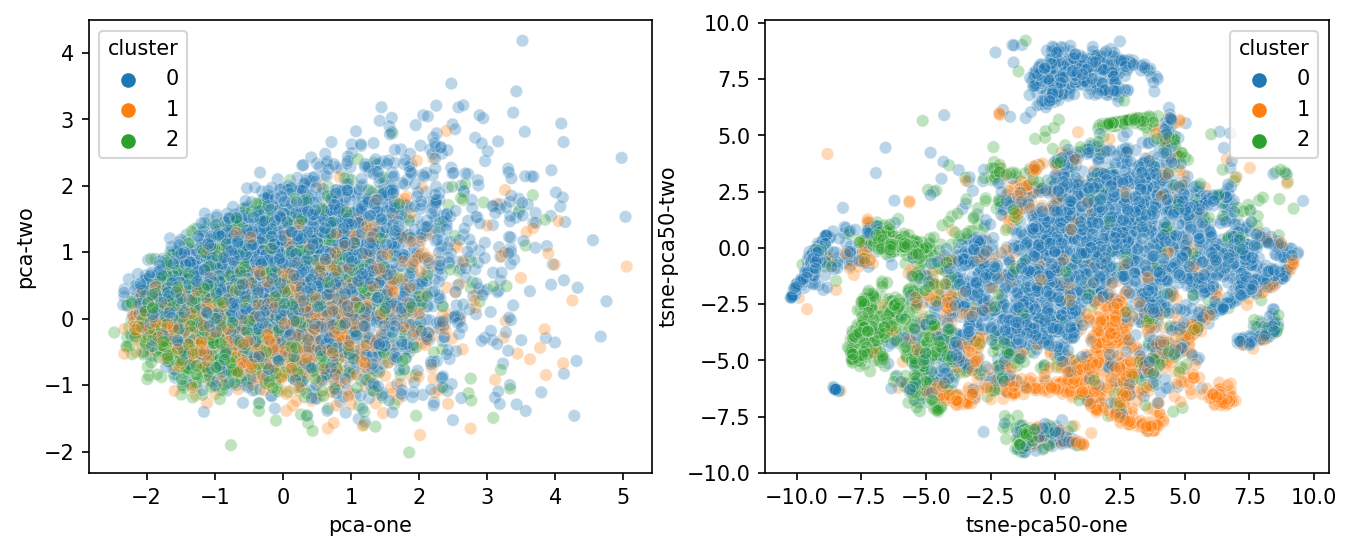

In [9]:
color = sns.color_palette("tab10", 3)
pca_tsne(data, '../fig/whword.png', 3, color)

On the PCA, we clearly see that there isn't any linear combination of variable that allows us to distinguish between the wh-clusters.

### Short and Long Queries

In [10]:
data['cluster'] = queries['length_cluster']

Computing PCA...
Explained variation per component: [0.11791814 0.07368709 0.06430478]
Computing tsne...


/home/slupart/miniconda3/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/slupart/miniconda3/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


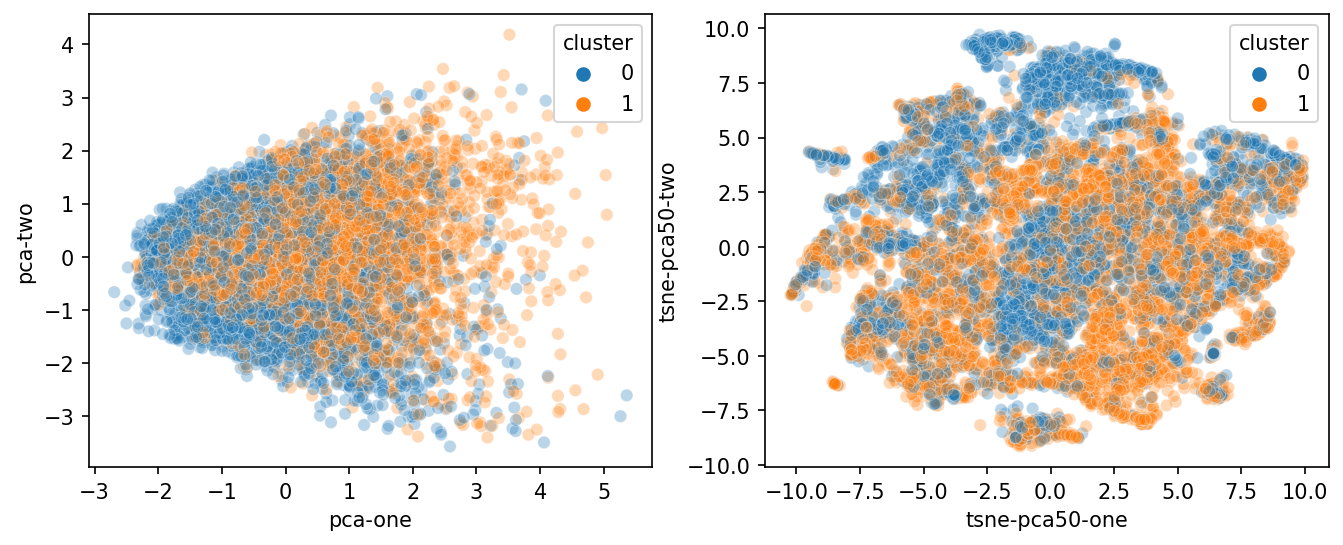

In [11]:
color = sns.color_palette("tab10", 2)
pca_tsne(data, '../fig/length.png', 2, color)

Here on the PCA, the distinction is clearer. It is reasonable as the CLS representations of long queries contain more information, so they might have some distingable characteristics.

## Similarity

In [7]:
import collections

We include below, functions to compute the weighted Jaccard similarity.

In [8]:
def Jaccard_sim_freq(doc1, doc2):
    # norm freq = freq of a word/sum(freq of all other word)
    # S_k = norm freq of word k in source
    # T_k = norm freq of word k in target
    # jacc = sum_k(min(S_k,T_k))/sum_k(max(S_k, T_k))
    words_doc1 = collections.Counter(doc1.lower().split())
    words_doc2 = collections.Counter(doc2.lower().split())
    
    nb_words_1 = np.sum([v for k, v in words_doc1.items()])
    nb_words_2 = np.sum([v for k, v in words_doc2.items()])
    
    freq_doc1 = {k: v/nb_words_1 for k, v in words_doc1.items()}
    freq_doc2 = {k: v/nb_words_2 for k, v in words_doc2.items()}
    
    sum_freq_1 = np.sum([v for k, v in freq_doc1.items()])
    sum_freq_2 = np.sum([v for k, v in freq_doc2.items()])
    
    norm_freq_doc1 = {k: v/sum_freq_1 for k, v in freq_doc1.items()}
    norm_freq_doc2 = {k: v/sum_freq_2 for k, v in freq_doc2.items()}
    
    all_words = set(list(words_doc1.keys()) +list(words_doc2.keys()))
    sum_max=0
    sum_min=0
    for w in all_words:
        if w not in norm_freq_doc1:
            s_k=0
        else:
            s_k=norm_freq_doc1[w]
        if w not in norm_freq_doc2:
            t_k=0
        else:
            t_k=norm_freq_doc2[w]
        sum_max += max(s_k, t_k)
        sum_min += min(s_k, t_k)
    return sum_min/sum_max

For the topic clusters, we compute the Jaccard between one cluster (target) versus the four remaining (train).

In [19]:
for target_i in range(5):
    target = " ".join(list(queries[queries['topic_cluster']==target_i]['query']))
    
    train_l = []
    for train_i in range(5):
        if target_i==train_i:
            continue
        train_l += list(queries[queries['topic_cluster']==train_i]['query'])
    train = " ".join(train_l)
    
    print("Cluster", target_i, ":")
    print("Weighted Jaccard Similarity", Jaccard_sim_freq(train, target))

Cluster 0 :
Weighted Jaccard Similarity 0.3333918697728162
Cluster 1 :
Weighted Jaccard Similarity 0.26317597154274397
Cluster 2 :
Weighted Jaccard Similarity 0.3686298950498056
Cluster 3 :
Weighted Jaccard Similarity 0.32173475784019145
Cluster 4 :
Weighted Jaccard Similarity 0.4701062826234546


Those are the similarities we used in Figure 1 and Figure 2 for topic clusters.